<a href="https://colab.research.google.com/github/KILjungjoon/Term_Project/blob/main/TpopLinearRegresson_pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/A Comparative Study on K-pop and T-pop in the Covid-19 Era/final-term/t_sentimentsumconcat.xlsx")
df

,date,good,happy,sad,angry,fear,disgust,shock,positive,negative
0,202001,0.553246,0.106558,0.325409,0.002169,0.036158,0.451908,0.002475,12.006840,1.141584
1,202002,0.585635,0.137438,0.346551,0.002169,0.033754,0.453750,0.002475,11.962436,1.085732
2,202003,0.552146,0.141425,0.384004,0.002169,0.040745,0.470364,0.002475,12.228258,1.155808
3,202004,0.504352,0.136800,0.364126,0.002169,0.049804,0.436106,0.002475,12.589562,1.093255
4,202005,0.473177,0.147447,0.374295,0.010388,0.038634,0.478164,0.002475,12.444519,1.197245
...,...,...,...,...,...,...,...,...,...,...
142,202239,0.455238,0.140915,0.358107,0.004657,0.045729,0.464536,0.015434,12.317159,1.063120
143,202240,0.526825,0.140865,0.363439,0.004657,0.058888,0.468816,0.010672,12.165643,1.165201
144,202241,0.479706,0.131579,0.367534,0.004657,0.065856,0.491171,0.023134,12.266188,1.199362
145,202242,0.460487,0.148504,0.332239,0.004657,0.082789,0.476472,0.010672,12.113508,1.248865


In [3]:
df.columns

Index(['date', 'good', 'happy', 'sad', 'angry', 'fear', 'disgust', 'shock',
       'positive', 'negative'],
      dtype='object')

In [4]:
# 새로운 week 컬럼 생성
week=[]
for n in range(1, 148) :    # 1부터 시작하므로 147을 끝번호로 지정해야 한다.
  week.append(n)
df['week']=week
df=df[['week','date', 'good', 'happy', 'sad', 'angry', 'fear', 'disgust', 'shock',
       'positive', 'negative']]    # week컬럼을 첫 컬럼으로 위치 변경

In [5]:
df

,week,date,good,happy,sad,angry,fear,disgust,shock,positive,negative
0,1,202001,0.553246,0.106558,0.325409,0.002169,0.036158,0.451908,0.002475,12.006840,1.141584
1,2,202002,0.585635,0.137438,0.346551,0.002169,0.033754,0.453750,0.002475,11.962436,1.085732
2,3,202003,0.552146,0.141425,0.384004,0.002169,0.040745,0.470364,0.002475,12.228258,1.155808
3,4,202004,0.504352,0.136800,0.364126,0.002169,0.049804,0.436106,0.002475,12.589562,1.093255
4,5,202005,0.473177,0.147447,0.374295,0.010388,0.038634,0.478164,0.002475,12.444519,1.197245
...,...,...,...,...,...,...,...,...,...,...,...
142,143,202239,0.455238,0.140915,0.358107,0.004657,0.045729,0.464536,0.015434,12.317159,1.063120
143,144,202240,0.526825,0.140865,0.363439,0.004657,0.058888,0.468816,0.010672,12.165643,1.165201
144,145,202241,0.479706,0.131579,0.367534,0.004657,0.065856,0.491171,0.023134,12.266188,1.199362
145,146,202242,0.460487,0.148504,0.332239,0.004657,0.082789,0.476472,0.010672,12.113508,1.248865


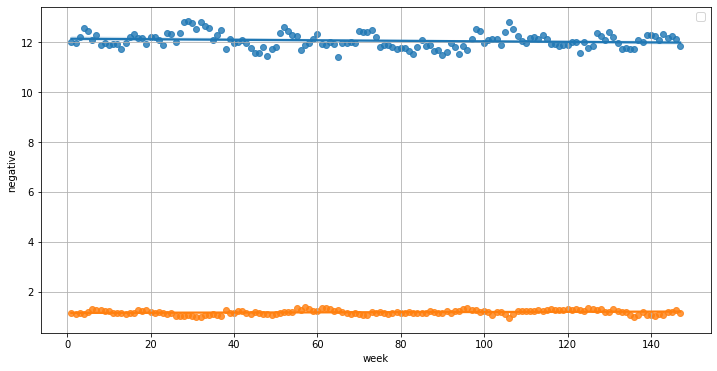

<positive>-------------------------------------
-0.0010563065457763403 12.142615635861153
12.141559329315378
Positive=
                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.313
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0708
Time:                        00:23:16   Log-Likelihood:                -29.893
No. Observations:                 147   AIC:                             63.79
Df Residuals:                     145   BIC:                             69.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [6]:
# 그래프 코드 https://lovelydiary.tistory.com/339

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
 
#pyplot과 seaborn으로 회귀그래프 
plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='week', y='positive', data=df)
sns.regplot(x='week', y='negative', data=df)
plt.legend(fontsize=11, loc='best')
# plt.xlim(df['week'].min()-1, df['week'].max()+1)   # x축 범위의 margin 삭제
plt.grid()
plt.show()
print('<positive>-------------------------------------') 
z=np.polyfit(df['week'], df['positive'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))
print("Positive=")
 
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
print(ols('positive ~ week', data=df).fit().summary())
print()
print('<negative>-------------------------------------') 
z=np.polyfit(df['week'], df['negative'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))
 
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
print(ols('negative ~ week', data=df).fit().summary())